In [ ]:
import pandas as pd

df = pd.read_csv(r'data\raw\loan-recovery.csv') ## give the path of your raw dataset.

In [3]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borrower_ID              500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Employment_Type          500 non-null    object 
 4   Monthly_Income           500 non-null    int64  
 5   Num_Dependents           500 non-null    int64  
 6   Loan_ID                  500 non-null    object 
 7   Loan_Amount              500 non-null    int64  
 8   Loan_Tenure              500 non-null    int64  
 9   Interest_Rate            500 non-null    float64
 10  Loan_Type                500 non-null    object 
 11  Collateral_Value         500 non-null    float64
 12  Outstanding_Loan_Amount  500 non-null    float64
 13  Monthly_EMI              500 non-null    float64
 14  Payment_History          5

## Exploratory Data Analysis

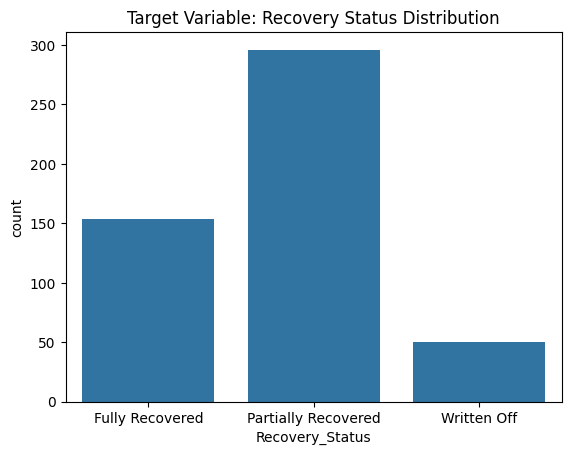

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Recovery_Status', data=df)
plt.title('Target Variable: Recovery Status Distribution')
plt.xticks([0, 1, 2], ['Fully Recovered', 'Partially Recovered', 'Written Off'])
plt.show()


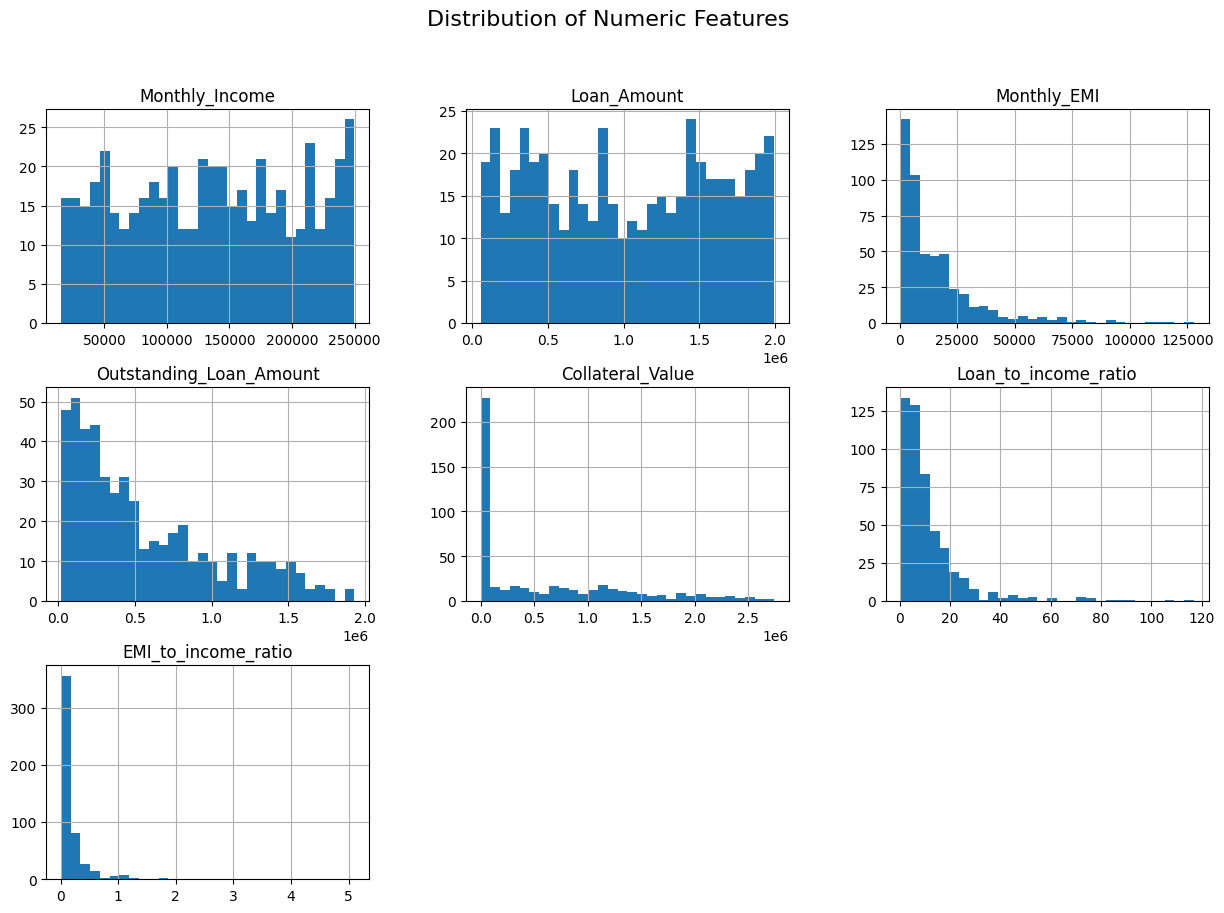

In [8]:
df['Loan_to_income_ratio'] = df['Loan_Amount']/df['Monthly_Income']
df['EMI_to_income_ratio'] = df['Monthly_EMI']/df['Monthly_Income']

num_cols = ['Monthly_Income', 'Loan_Amount', 'Monthly_EMI', 'Outstanding_Loan_Amount', 'Collateral_Value', 'Loan_to_income_ratio', 'EMI_to_income_ratio']

df[num_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()


## Correlation Heatmap

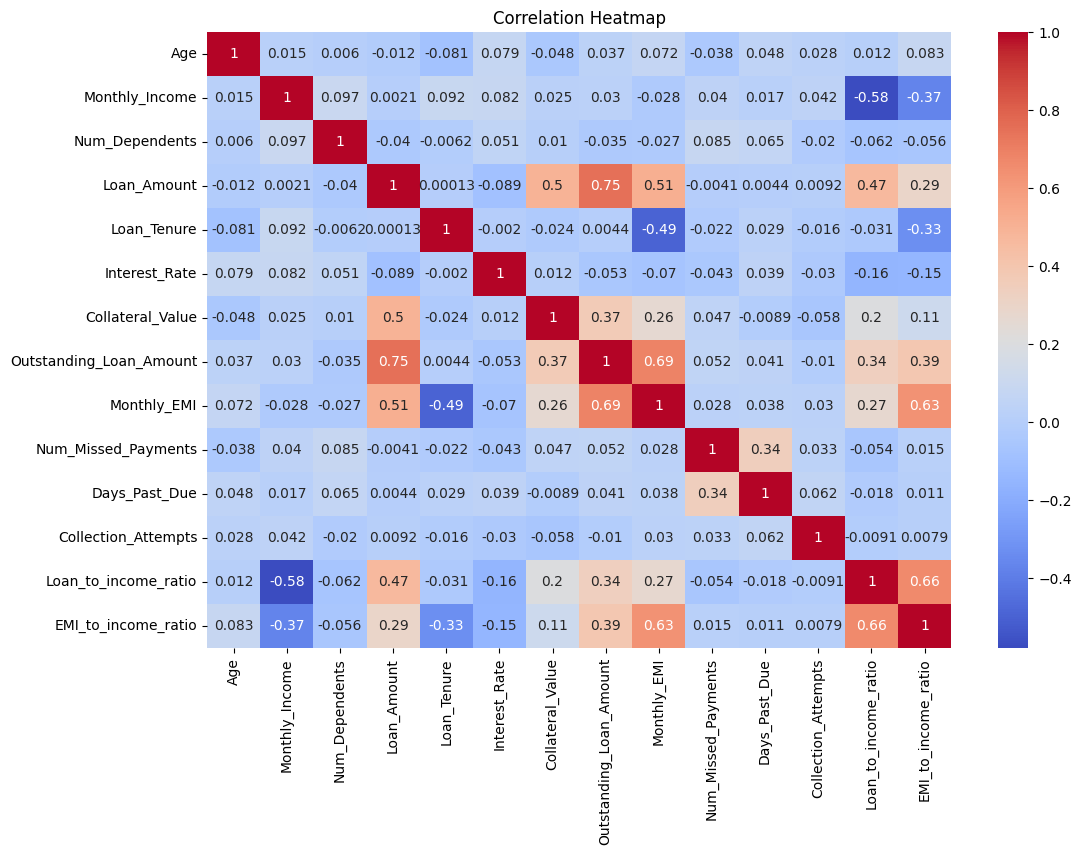

In [ ]:
numeric_df = df.select_dtypes(include='number')


plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Box Plots

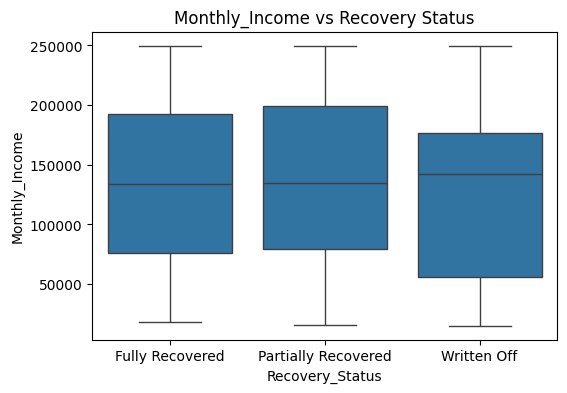

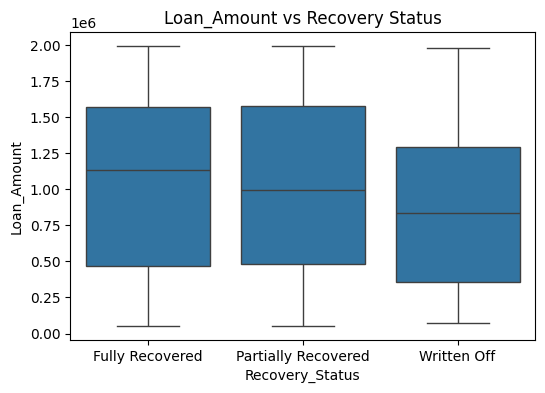

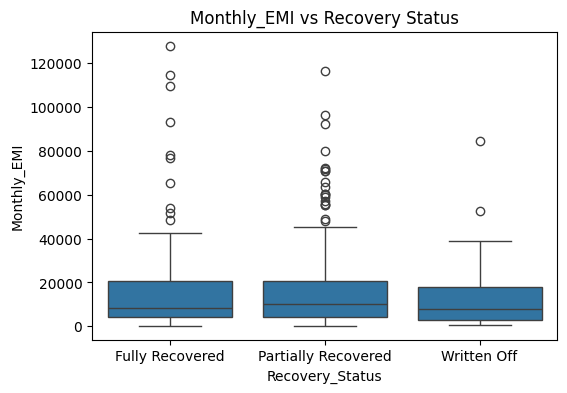

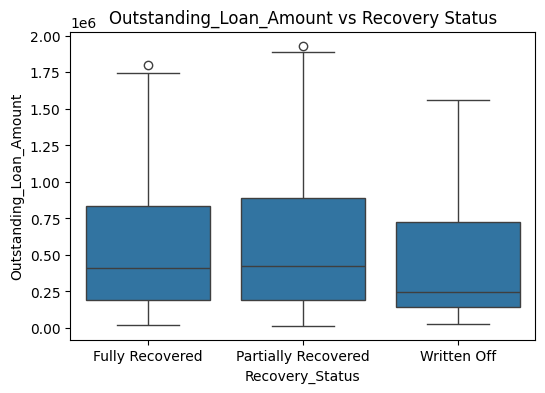

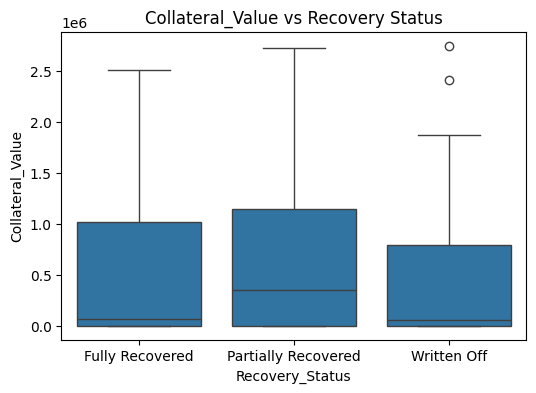

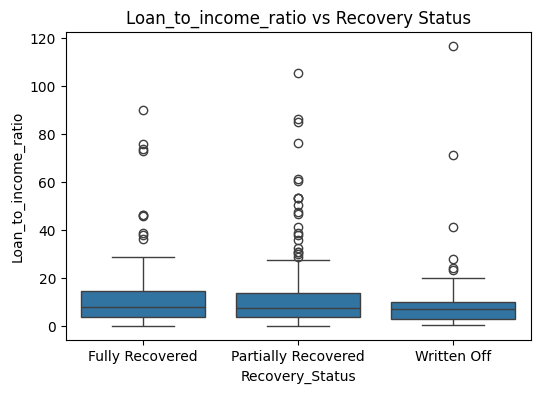

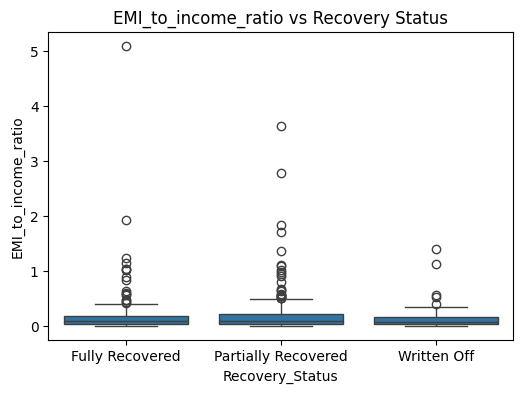

In [11]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Recovery_Status', y=col, data=df)
    plt.title(f'{col} vs Recovery Status')
    plt.xticks([0, 1, 2], ['Fully Recovered', 'Partially Recovered', 'Written Off'])
    plt.show()


## Categorical Plots

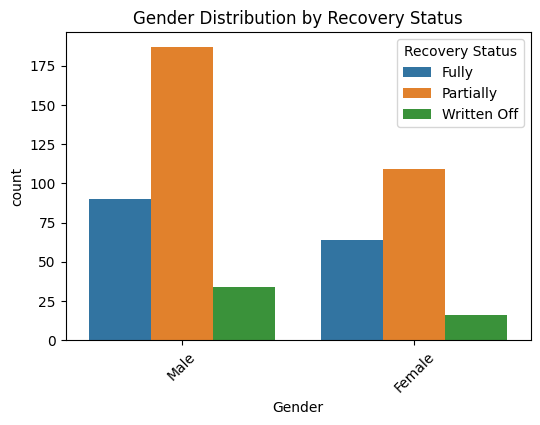

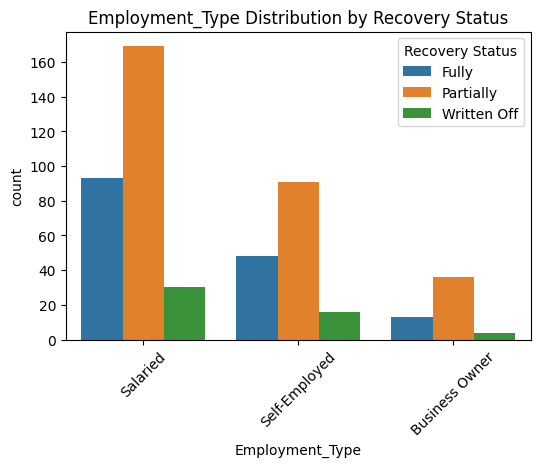

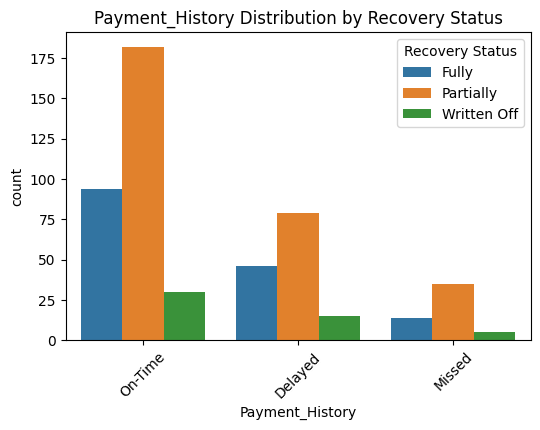

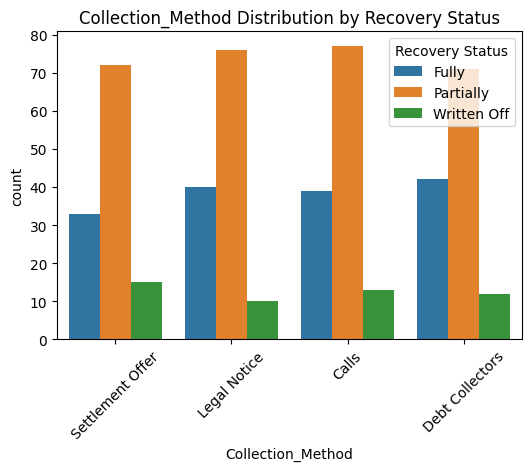

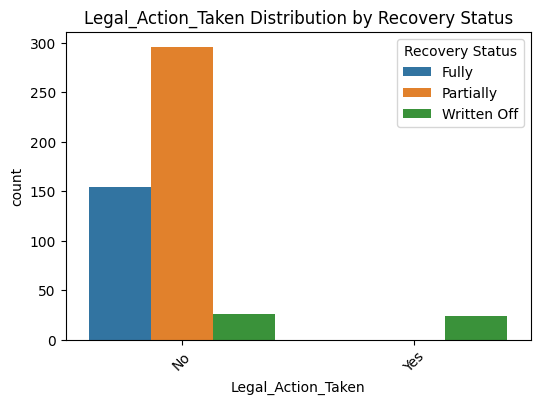

In [13]:
cat_cols = ['Gender', 'Employment_Type', 'Payment_History', 'Collection_Method', 'Legal_Action_Taken']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Recovery_Status', data=df)
    plt.title(f'{col} Distribution by Recovery Status')
    plt.xticks(rotation=45)
    plt.legend(title='Recovery Status', labels=['Fully', 'Partially', 'Written Off'])
    plt.show()


## Some Plots to visualize numerical Columns

e.g Loan Amount , Loan Tenure , Interest Rate

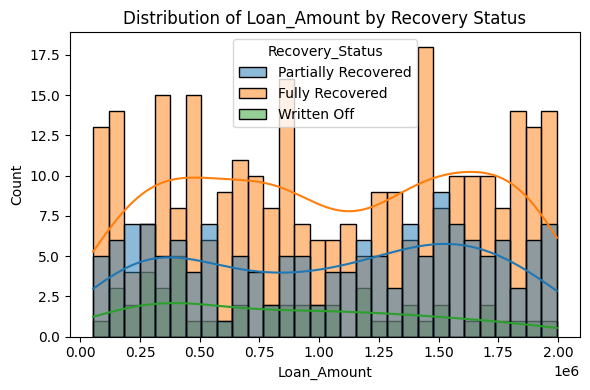

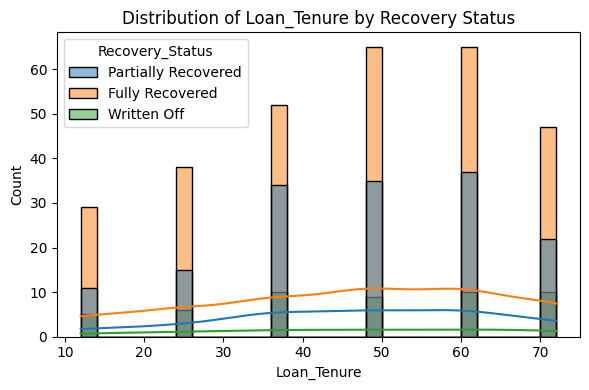

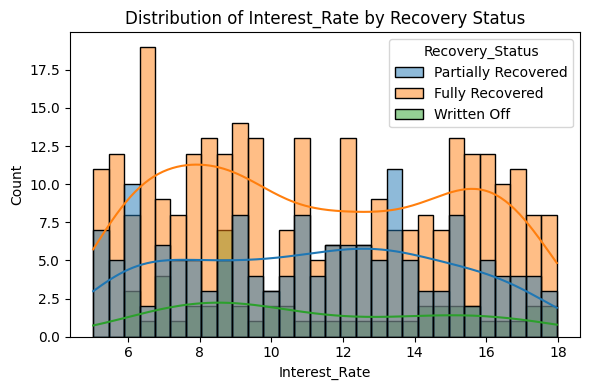

In [ ]:
num_cols = ['Loan_Amount', 'Loan_Tenure', 'Interest_Rate']  

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Recovery_Status', kde=True, bins=30)
    plt.title(f'Distribution of {col} by Recovery Status')
    plt.tight_layout()
    plt.show()


# Box plots for the same


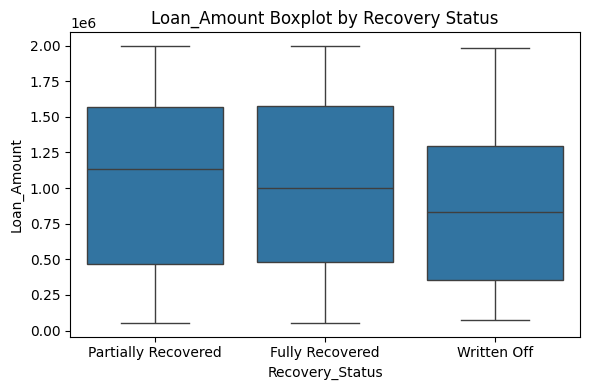

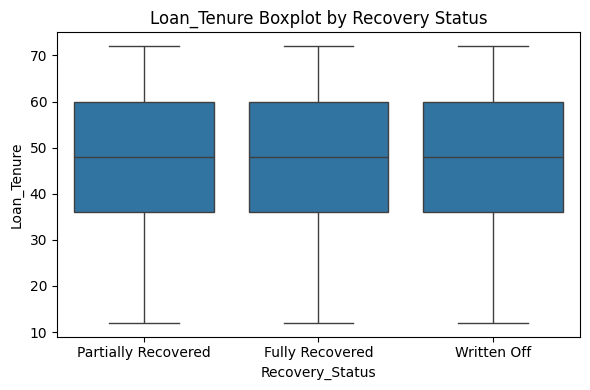

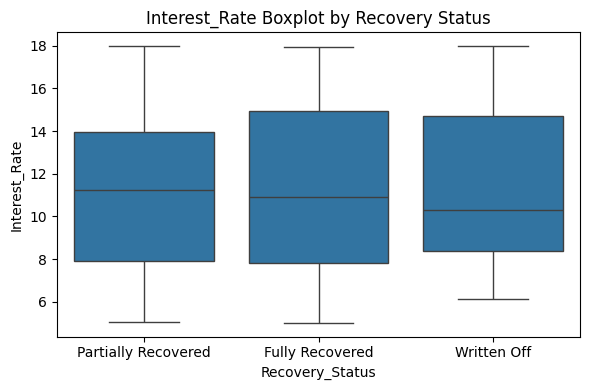

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Recovery_Status', y=col, data=df)
    plt.title(f'{col} Boxplot by Recovery Status')
    plt.tight_layout()
    plt.show()


# Correlation Heatmap for numerical features

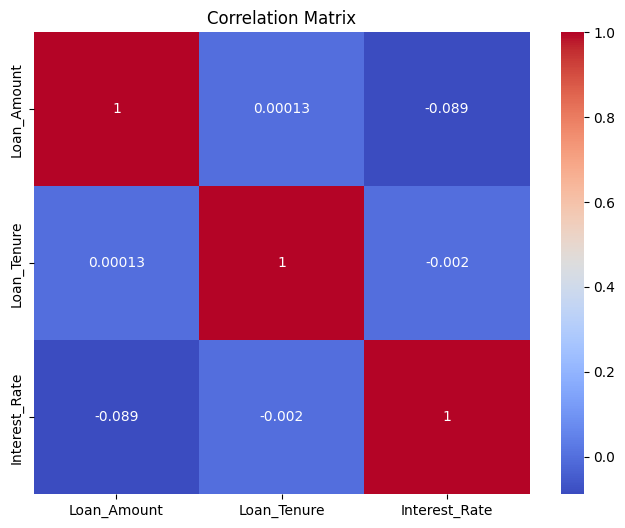

In [17]:
plt.figure(figsize=(8, 6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Recovery Rate Analysis

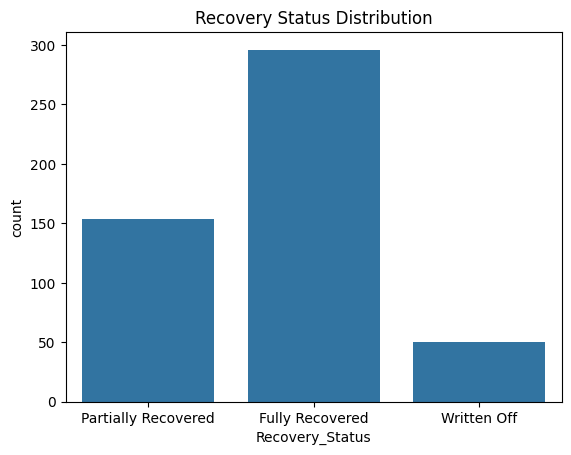

Recovery_Status
Fully Recovered        0.592
Partially Recovered    0.308
Written Off            0.100
Name: proportion, dtype: float64

In [18]:
sns.countplot(x='Recovery_Status', data=df)
plt.title('Recovery Status Distribution')
plt.show()

# Check class imbalance
df['Recovery_Status'].value_counts(normalize=True)
